DecisionTreeClassifier 特征选择参数
criterion 可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。除非你更喜欢类似ID3, C4.5的最优特征选择方法。

In [1]:
from sklearn import tree
from sklearn.datasets import load_iris 

#载入sklearn中自带的数据Iris，构造决策树

iris=load_iris()
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(iris.data,iris.target)

print iris.feature_names
print iris.data
print iris.target_names
print iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.

In [2]:
#训练完成后，我们可以用 export_graphviz 将树导出为 Graphviz 格式
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

此时已经在本地生成了 iris.dot 文件，在命令行输入 dot -Tpdf iris.dot -o iris.pdf 生成决策树的PDF可视化文件，打开 iris.pdf就能够看到生成的图片了。

#  方法一、直接读取生成图片

不需要运行 dot -Tpdf iris.dot -o iris.pdf 命令生成图片

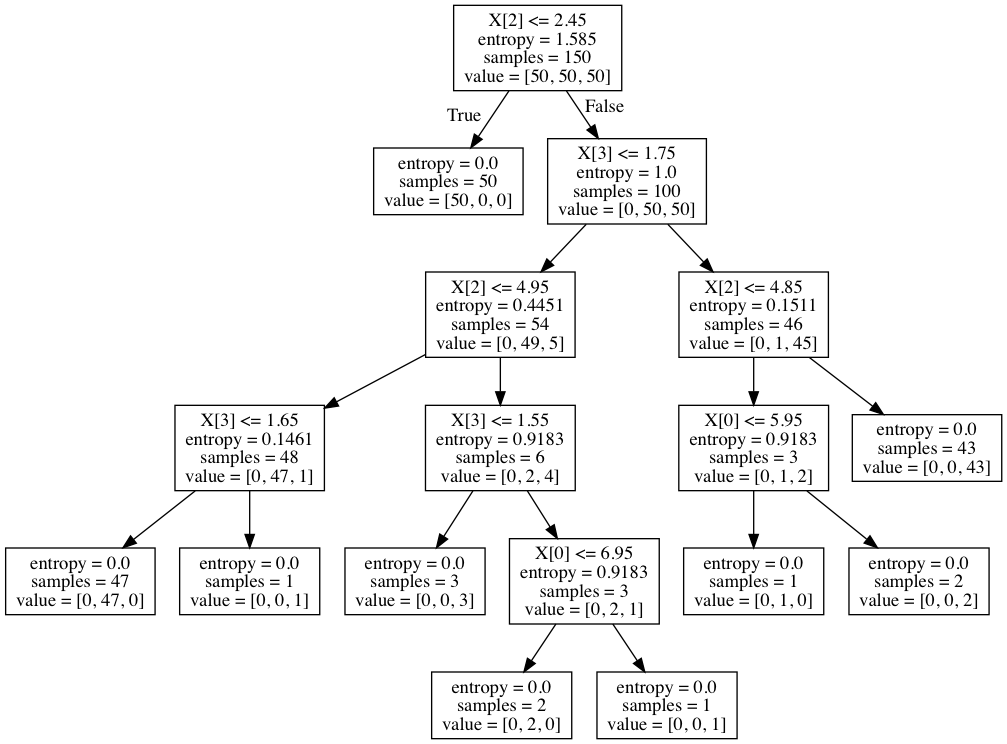

In [3]:
from pydotplus import graphviz
from IPython.display import Image  

dot_data = tree.export_graphviz(clf)
graph = graphviz.graph_from_dot_file("iris.dot")
Image(graph.create_png())

# 方法二：使用 pydotplus 直接生成 iris.pdf

In [26]:
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf,
        out_file=dot_data,
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        filled=True, rounded=True,
        impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("iris.pdf")

True

# 方法三：直接在 jupyter notebook 中生成

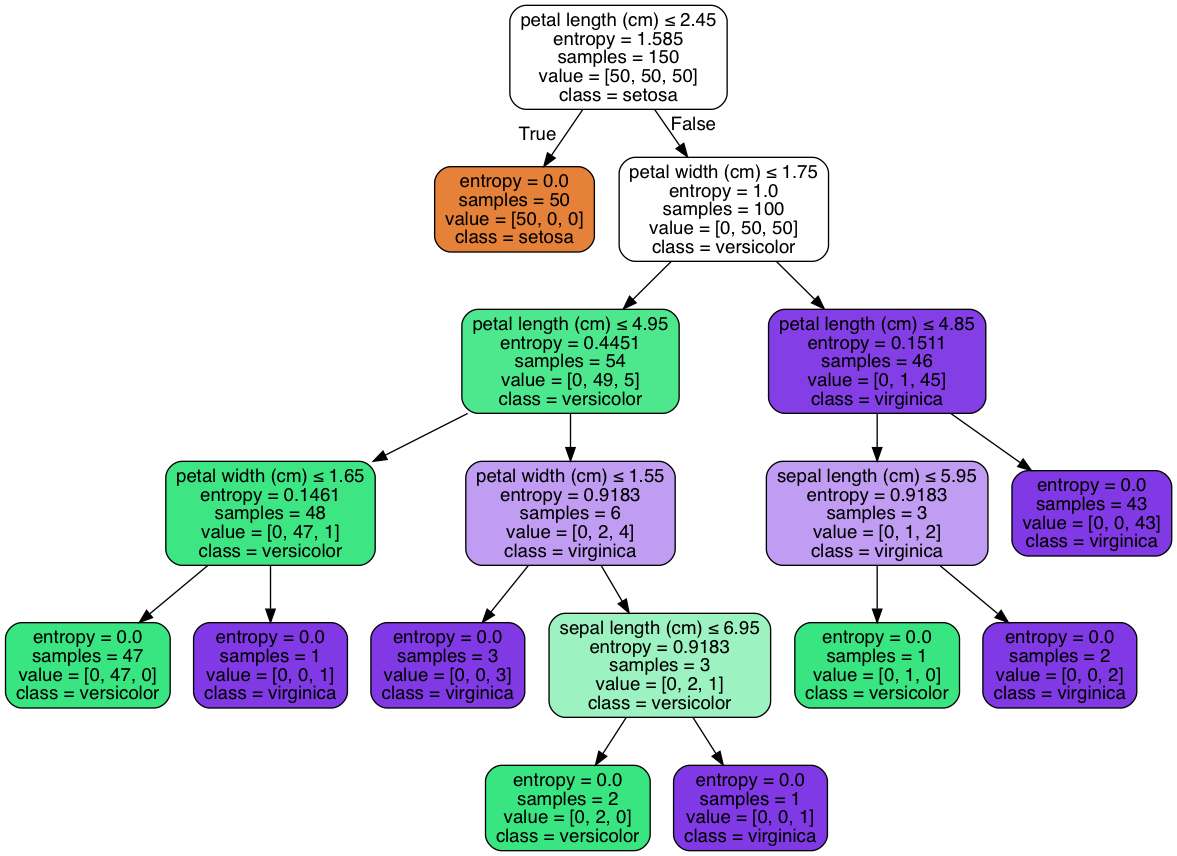

In [5]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO

dot_data = StringIO()

# tree.export_graphviz(clf,
#         out_file=dot_data,
#         feature_names=iris.feature_names,
#         class_names=iris.target_names,
#         filled=True, rounded=True,
#         impurity=False)  

tree.export_graphviz(clf, out_file=dot_data, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())